# MATH 360 Introduction to Mathematical Modelling

## Learning Goals

* ...

## Prelecture Activities

### Readings

* ...

### Reflections

* ...

### Tasks

* ...

## Lecture Activities

* Active Learning (AL) Lecture
* Think-Pair-Share
* Group Work
* Paired Group Presentations

### Partial Derivatives of the Logistic Function [Group Work: 5 minutes]

In the previous example, we used graphical methods to show how $\sigma(x; W,b)$ depends on $W$ and $b$. Now let's do some analysis.

Let $z = Wx + b$ and $\sigma(z) = \sigma(x; W,b)$. Compute and simplify the partial derivatives $\displaystyle \frac{\partial \sigma}{\partial W}$ and $\displaystyle \frac{\partial \sigma}{\partial b}$. How do these formulas related to our previous graphical observations?

**Solution.**

$$
\frac{\partial \sigma}{\partial W} = \sigma'(z) \frac{\partial z}{\partial W} = x \sigma(x;W,b) (1 - \sigma(x;W,b))
$$

$$
\frac{\partial \sigma}{\partial b} = \sigma'(z) \frac{\partial z}{\partial b} = \sigma(x;W,b) (1 - \sigma(x;W,b))
$$

### Gradient Descent

$$
C(W,b) = \sum_{k=0}^{N-1} (y_k - \sigma(x_k; W,b) )^2
$$

$$
\frac{\partial C}{\partial W} = -2 \sum_{k=0}^{N-1} x_k \sigma(x_k; W,b) (1 - \sigma(x_k; W,b)) ( y_k - \sigma(x_k; W,b) )
$$

$$
\frac{\partial C}{\partial b} = -2 \sum_{k=0}^{N-1} \sigma(x_k; W,b) (1 - \sigma(x_k; W,b)) ( y_k - \sigma(x_k; W,b) )
$$


In [78]:
sigma = lambda x,W,b: 1/(1 + np.exp(-(W*x + b)))
C = lambda W,b: np.sum((y - sigma(x,W,b))**2)
num = 50; alpha = 0.5;
WC = 1; bC = 1;
for n in range(num):
    terms = sigma(x,WC,bC)*(1 - sigma(x,WC,bC))*(y - sigma(x,WC,bC))
    dCdW = -2*np.sum(x*terms)
    dCdb = -2*np.sum(terms)
    WC = WC - alpha*dCdW
    bC = bC - alpha*dCdb
    if n%5 == 0:
        print("n =",n,"Cost =",C(WC,bC),"WC =",WC,"bC =",bC)

n = 0 Cost = 1.471042276869974 WC = 1.193576451530732 bC = 0.6412473439903903
n = 5 Cost = 1.158341243454282 WC = 1.1661179573938825 bC = -0.24067505806020328
n = 10 Cost = 1.131941470022167 WC = 1.1307222790199476 bC = -0.49039390395150545
n = 15 Cost = 1.1301376493975046 WC = 1.1551868079654204 bC = -0.5532735303726207
n = 20 Cost = 1.1298450510595177 WC = 1.1708548440719113 bC = -0.5757557439030588
n = 25 Cost = 1.129787008204597 WC = 1.1783797168911025 bC = -0.585376991787795
n = 30 Cost = 1.1297749035906932 WC = 1.181874942666931 bC = -0.589725284062541
n = 35 Cost = 1.1297723271735491 WC = 1.1834951331670371 bC = -0.591725420033667
n = 40 Cost = 1.1297717737265125 WC = 1.1842472579277437 bC = -0.5926515125395398
n = 45 Cost = 1.1297716543350158 WC = 1.1845968078361635 bC = -0.5930814785191801


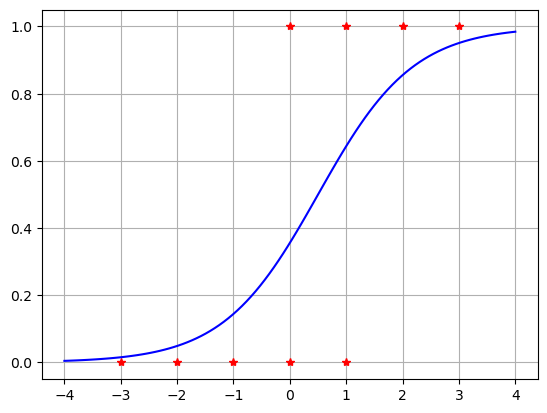

In [52]:
xhat = np.linspace(np.min(x)-1,np.max(x)+1,100)
yhatC = sigma(xhat,WC,bC)
plt.plot(x,y,'r*',xhat,yhatC,'b'), plt.grid(True)
plt.show()

In [79]:
E = lambda W,b: -np.sum( y*np.log(sigma(x,W,b)) + (1 - y)*np.log(1 - sigma(x,W,b)))

num = 10; alpha = 0.5;
WE = 1; bE = 1;
for n in range(num):
    terms = sigma(x,WE,bE) - y
    dEdW = np.sum(x*terms)
    dEdb = np.sum(terms)
    WE = WE - alpha*dEdW
    bE = bE - alpha*dEdb
    print("n =",n,"Entropy =",E(WE,bE),"WE =",WE,"bE =",bE)

n = 0 Entropy = 3.5763640359776407 WE = 1.3913539145459932 bE = -0.023221786734114236
n = 1 Entropy = 3.3632413473625995 WE = 1.3540709504431692 bE = -0.41063055054338854
n = 2 Entropy = 3.321613808532693 WE = 1.3959163870321838 bE = -0.5707880881936295
n = 3 Entropy = 3.308050175338244 WE = 1.445324873567641 bE = -0.647514375228093
n = 4 Entropy = 3.302435187606345 WE = 1.4817108035662916 bE = -0.6928204157222542
n = 5 Entropy = 3.2999148353065575 WE = 1.507055976548803 bE = -0.7221007809191053
n = 6 Entropy = 3.2987325840843615 WE = 1.5247005322756977 bE = -0.7417877694811115
n = 7 Entropy = 3.2981624607157967 WE = 1.53706008503374 bE = -0.7553094255225752
n = 8 Entropy = 3.297882468644048 WE = 1.5457669519088777 bE = -0.7647182103721255
n = 9 Entropy = 3.2977432544106926 WE = 1.551927193869799 bE = -0.7713209971605252


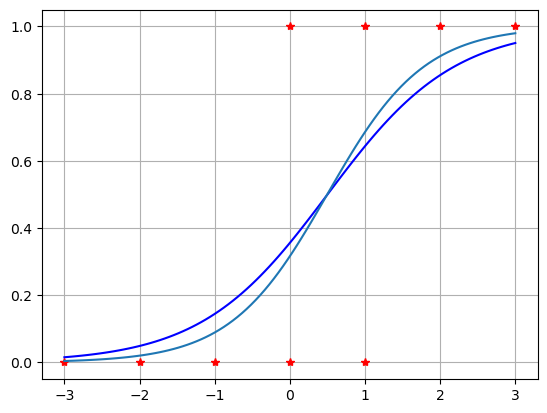

In [54]:
xhat = np.linspace(np.min(x),np.max(x),100)
yhatC = sigma(xhat,WC,bC)
yhatE = sigma(xhat,WE,bE)
plt.plot(x,y,'r*',xhat,yhatC,'b',xhat,yhatE), plt.grid(True)
plt.show()

## Deliverable

* Submit to Canvas ...